In [1]:
#librerías para analizar datos:
import os, numpy as np, pandas as pd
import scipy # herramientas y algoritmos matemáticos
import matplotlib.pyplot as plt, seaborn as sns # gráficos
import os
import math
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt # Visualizaciones
import seaborn as sns # Visualizaciones mas sencillas

## Para el ajuste del modelo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

## Para el preprocesamiento
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector

## Metricas
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
## Modelo
from sklearn import tree

In [2]:
#Importar datos:
data = pd.read_csv('TAI_AN_ESTUDIANTE_12072024_v2.csv')
data.head(5)

/var/folders/3n/wr348_g54y3dnpq24d5zdn9w0000gn/T/ipykernel_4191/973268968.py:2: DtypeWarning: Columns (1,42,43,44,45,46,78,79,80,81,83,84,85,87,89,90,91,92,94,95,96,98,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('TAI_AN_ESTUDIANTE_12072024_v2.csv')


,ID,ESTUDIANTE_FECHA_FALLECIMIENTO,ESTUDIANTE_CARRERA_NIVEL_COD,ESTUDIANTE_CARRERA_NIVEL,ESTUDIANTE_CARRERA_MODALID_COD,ESTUDIANTE_CARRERA_MODALIDAD,ESTUDIANTE_CARRERA_CODIGO,ESTUDIANTE_CARRERA_NOMBRE,ESTUDIANTE_CARRERA_MALLA_COD,ESTUDIANTE_CARRERA_PLAN_ESTUD,...,TOTAL_TAREAS_PLANIFICADAS,TOTAL_TAREAS_REALIZADAS,TOTAL_TAREAS_NO_REALIZADAS,TOTAL_TAREAS_CALIFICADAS,PROMEDIO_NOTA_TAREAS,TOTAL_REUNIONES,DIA_RECURRENTE_REUNIONES,TOTAL_REUNIONES_MINUTOS,TOTAL_PARTICIPACIONES,TOTAL_PARTICIPACIONES_MINUTOS
0,230,NaN,GR,GRADO,D,DISTANCIA,DERE_D1,DERECHO,DED3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,231,NaN,GR,GRADO,D,DISTANCIA,CONT_D1,CONTABILIDAD Y AUDITORIA,CAD1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,232,NaN,GR,GRADO,D,DISTANCIA,DERE_D1,DERECHO,DED3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,234,NaN,GR,GRADO,D,DISTANCIA,COMU_D1,COMUNICACION,CMD3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,237,NaN,GR,GRADO,D,DISTANCIA,CONT_D1,CONTABILIDAD Y AUDITORIA,CAD3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data['EST_CARR_PER_INGRESO'].unique()

array(['OCT/2015 - FEB/2016', 'ABR/2008 - AGO/2008',
       'ABR/2011 - AGO/2011', 'OCT/2013 - FEB/2014',
       'OCT/2012 - FEB/2013', 'ABR/2010 - AGO/2010',
       'ABR/2021 - AGO/2021', 'ABR/2022 - AGO/2022',
       'ABR/2013 - AGO/2013', 'ABR/2017 - AGO/2017',
       'OCT/2005 - FEB/2006', 'OCT/2014 - FEB/2015',
       'ABR/2018 - AGO/2018', 'ABR/2020 - AGO/2020',
       'OCT/2016 - FEB/2017', 'ABR/2023 - AGO/2023',
       'ABR/2016 - AGO/2016', 'OCT/2011 - FEB/2012',
       'ABR/2005 - AGO/2005', 'ABR/2014 - AGO/2014',
       'OCT/2021 - FEB/2022', 'ABR/2006 - AGO/2006',
       'ABR/2012 - AGO/2012', 'OCT/2022 - FEB/2023',
       'OCT/2007 - FEB/2008', 'OCT/2023 - FEB/2024',
       'ABR/2009 - AGO/2009', 'ABR/2007 - AGO/2007',
       'OCT/2017 - FEB/2018', 'ABR/2015 - AGO/2015',
       'OCT/2020 - FEB/2021', 'OCT/2004 - FEB/2005',
       'OCT/2008 - FEB/2009', 'OCT/2009 - FEB/2010',
       'OCT/2010 - FEB/2011', 'ABR/2004 - AGO/2004',
       'OCT/2006 - FEB/2007', 'ABR/2002 - AGO/

In [4]:
# data['anio_inicio'] = data['EST_CARR_PER_INGRESO'].str.extract(r'(\d{4})').fillna(0).astype(int)
# data['anio_inicio'] = data['EST_CARR_PER_INGRESO'].str.extract(r'(\d{4})').astype('Int64')
# data['anio_inicio'] = data['EST_CARR_PER_INGRESO'].str.extract(r'(\d{4})')
# data = data.dropna(subset=['anio_inicio']).astype({'anio_inicio': 'int'})
# # Extrae el año de inicio de cada rango de fechas
# data['anio_inicio'] = data['EST_CARR_PER_INGRESO'].str.extract(r'(\d{4})').astype(int)

# # Encuentra el año más antiguo
# anio_mas_antiguo = data['anio_inicio'].min()
# print(f"El año más antiguo es: {anio_mas_antiguo}")

In [5]:
# Calcula el porcentaje total de valores nulos en el DataFrame dfv4
porcentaje_nulos_total = (data.isnull().sum().sum() / data.size) * 100

print(f"Porcentaje total de valores nulos en dfv4: {porcentaje_nulos_total:.2f}%")


Porcentaje total de valores nulos en dfv4: 55.09%


## EDA UNIVARIADO

Aquí se aplica resúmenes de datos sobre las variables numéricas y categóricas para comprender el dataset y descubrir valores faltantes o probablemente anómalos

In [6]:
data.shape # tamaño del dataset

(114519, 166)

In [7]:
# detalle de tipo de datos para descubrir si se asignaron bien los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114519 entries, 0 to 114518
Columns: 166 entries, ID to TOTAL_PARTICIPACIONES_MINUTOS
dtypes: float64(50), int64(9), object(107)
memory usage: 145.0+ MB


In [8]:
# Resúmenes de datos numéricos:
data.describe() # describe por defecto imprime un resumen de las variables numéricas.

,ID,ESTUDIANTE_CARRERA_PLAN_ESTUD,EST_CARR_UNIDADES_REQUERIDAS,EST_CARR_NUMERO_CICLOS,TOTAL_UNIDADES_ACUMULADAS,TOTAL_ASIGNATURAS_ACUMULADAS,TOTAL_UNIDADES_PENDIENTES,PORCENTAJE_AVANCE,PROMEDIO_GENERAL,ULTIMA_MATRICULA_PERIODO_COD,...,TOTAL_TAREAS_PLANIFICADAS,TOTAL_TAREAS_REALIZADAS,TOTAL_TAREAS_NO_REALIZADAS,TOTAL_TAREAS_CALIFICADAS,PROMEDIO_NOTA_TAREAS,TOTAL_REUNIONES,DIA_RECURRENTE_REUNIONES,TOTAL_REUNIONES_MINUTOS,TOTAL_PARTICIPACIONES,TOTAL_PARTICIPACIONES_MINUTOS
count,114519.000000,114519.000000,96608.000000,114519.000000,90072.000000,114519.000000,96608.000000,114518.000000,56722.000000,106383.000000,...,14766.000000,14766.000000,14766.000000,14766.000000,14742.000000,0.0,0.0,0.0,0.0,0.0
mean,122601.884858,1.209843,221.908983,8.709105,46.800593,9.817611,178.318348,18.632201,8.357007,201673.388511,...,37.780238,17.932074,19.847420,17.657592,7.607854,NaN,NaN,NaN,NaN,NaN
std,70118.199519,0.545589,141.529118,1.472358,107.543483,15.555844,119.085374,29.621384,0.687232,595.959215,...,13.339247,6.722545,7.357437,6.721486,1.483524,NaN,NaN,NaN,NaN,NaN
min,230.000000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,199462.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,61771.500000,1.000000,120.000000,8.000000,0.000000,0.000000,90.000000,0.000000,7.840000,201163.000000,...,31.000000,14.000000,16.000000,14.000000,7.043333,NaN,NaN,NaN,NaN,NaN
50%,123552.000000,1.000000,255.000000,8.000000,13.000000,1.000000,204.000000,0.000000,8.300000,201663.000000,...,44.000000,20.000000,22.000000,19.000000,7.729167,NaN,NaN,NaN,NaN,NaN
75%,182452.000000,1.000000,282.000000,10.000000,59.000000,13.000000,277.000000,25.000000,8.880000,202362.000000,...,47.000000,23.000000,24.000000,23.000000,8.453833,NaN,NaN,NaN,NaN,NaN
max,243074.000000,26.000000,1584.000000,12.000000,1584.000000,70.000000,1584.000000,100.000000,10.000000,202462.000000,...,69.000000,35.000000,49.000000,35.000000,12.015000,NaN,NaN,NaN,NaN,NaN


Del resumen presentado, nos fijamos en:

- **count**: para ver si hay valores marcados como nan de forma explícita. En este caso, todas las variables numéricas tienen valores completos.
- **min** y **max**: para determinar valores atípicos o posibles errores en los datos. 
Al observar estos valores, encontramos que: Aunque no hay valores nulos, marcados de forma explícita, nos fijamos que TOTAL_REUNIONES	DIA_RECURRENTE_REUNIONES	TOTAL_REUNIONES_MINUTOS	TOTAL_PARTICIPACIONES	TOTAL_PARTICIPACIONES_MINUTOS,  tiene valores NAN y es un indicativo de que hay valores desconocidos.
- **std**: para ver la dispersión de los datos.
valores cercanos a 0, nos dan una idea de posibles constantes.
Podemos inspeccionar más para ver si estas variables deben ser eliminadas.
Valores muy altos respecto de la media, indican alta dispersión de los datos o asimetría, lo cual puede dar una idea de valores atípicos altos.
Como resultado de esta primera exploración, tenemos que luego ver cuántas observaciones son afectadas para decidir qué hacer con ellas.

In [9]:
# Contar los valores únicos en cada columna
print(data.nunique())


ID                                114519
ESTUDIANTE_FECHA_FALLECIMIENTO        27
ESTUDIANTE_CARRERA_NIVEL_COD           2
ESTUDIANTE_CARRERA_NIVEL               2
ESTUDIANTE_CARRERA_MODALID_COD         3
                                   ...  
TOTAL_REUNIONES                        0
DIA_RECURRENTE_REUNIONES               0
TOTAL_REUNIONES_MINUTOS                0
TOTAL_PARTICIPACIONES                  0
TOTAL_PARTICIPACIONES_MINUTOS          0
Length: 166, dtype: int64


In [10]:
import skimpy 
skimpy.skim(data) # Resumen de todo el dataset

/Users/lilibethpuchaicela/anaconda3/envs/python/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 114519 │ │ string      │ 107   │                                                          │
│ │ Number of columns │ 166    │ │ float64     │ 50    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 9     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA     ┃ NA %  ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID               │      0 │     0 │  122600 │  70120 │    230 │  61770 │ 123600 │ 182500 │ 243100 │ ▇▇▇▇▇▇ │  │
│ │ ESTUDIANTE_CARRE │      0 │     0 │    1.21 │ 0.5456 │      1 │      1 │      1 │      1 │     26 │   ▇    │  │
│ │ RA_PLAN_ESTUD    │        │       │         │        │        │        │        │        │        │        │  │
│ │ EST_CARR_UNIDADE │  17911 │ 15.64 │   221.9 │  141.5 │     60 │    120 │    255 │    282 │   1584 │   ▇    │  │
│ │ S_REQUERIDAS     │        │       │         │        │        │        │        │        │        │        │  │
│ │ EST_CARR_NUMERO_ │      0 │     0 │   8.709 │  1.472 │      1 │      8 │      8 │     10 │     12 │    ▇▇  │  │
│ │ CICLOS           │        │       │         │        │        │        │        │        │        │        │  │
│ │ TOTAL_UNIDADES_A │  24447 │ 21.35 │    46.8 │  107.5 │      0 │      0 │     13 │     59 │   1584 │   ▇    │  │
│ │ CUMULADAS        │        │       │         │        │        │        │        │        │        │        │  │
│ │ TOTAL_ASIGNATURA │      0 │     0 │   9.818 │  15.56 │      0 │      0 │      1 │     13 │     70 │  ▇▁▁▁  │  │
│ │ S_ACUMULADAS     │        │       │         │        │        │        │        │        │        │        │  │
│ │ TOTAL_UNIDADES_P │  17911 │ 15.64 │   178.3 │  119.1 │      0 │     90 │    204 │    277 │   1584 │   ▇▃   │  │
│ │ ENDIENTES        │        │       │         │        │        │        │        │        │        │        │  │
│ │ PORCENTAJE_AVANC │      1 │     0 │   18.63 │  29.62 │      0 │      0 │      0 │     25 │    100 │ ▇▁▁▁ ▁ │  │
│ │ E                │        │       │         │        │        │        │        │        │        │        │  │
│ │ PROMEDIO_GENERAL │  57797 │ 50.47 │   8.357 │ 0.6872 │      7 │   7.84 │    8.3 │   8.88 │     10 │ ▃▇▇▆▅▂ │  │
│ │ ULTIMA_MATRICULA │   8136 │   7.1 │  201700 │    596 │ 199500 │ 201200 │ 201700 │ 202400 │ 202500 │   ▂▆▅▇ │  │
│ │ _PERIODO_COD     │        │       │         │        │        │        │        │        │        │        │  │
│ │ CICLO_AVANCE_SEM │    152 │  0.13 │   1.237 │  2.411 │      0 │      0 │      0 │      1 │     12 │  ▇▁▁   │  │
│ │ ESTRE            │        │       │         │        │        │        │        │        │        │        │  │
│ │ CICLO_AVANCE_UNI │  17911 │ 15.64 │   1.541 │  2.471 │      0 │      0 │      0 │   2.02 │  25.07 │   ▇▁   │  │
│ │ DADES            │        │       │         │       

Del resumen anterior, se encontró que hay:

59 variables numéricas
107 categóricas

# Distribución de Género 

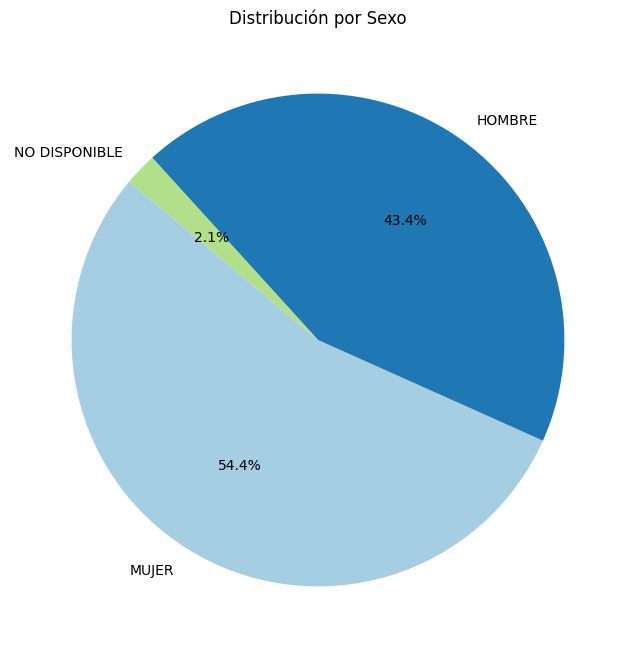

In [11]:
# Contar las ocurrencias de cada categoría en 'ESTUDIANTE_SEXO'
counts = data['ESTUDIANTE_SEXO'].value_counts()

# Crear el gráfico de sectores
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))

# Ajustar el título
plt.title('Distribución por Sexo')

# Mostrar el gráfico
plt.show()

###  CONDICIÓN DE LOS ESTUDIANTES

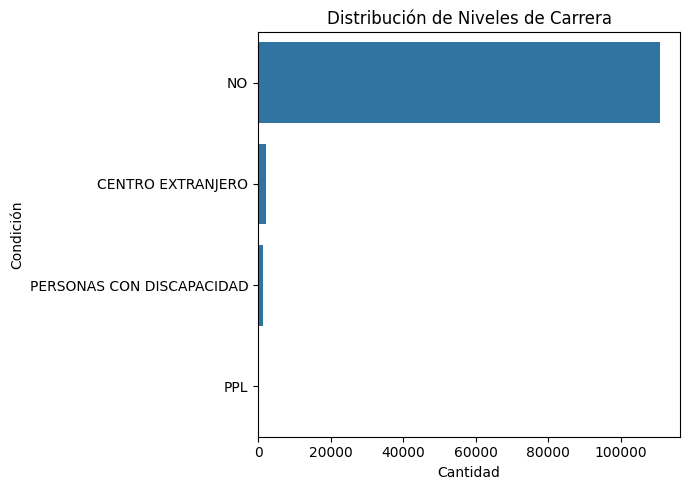

In [12]:
# Aumenta el tamaño de la figura
plt.figure(figsize=(7, 5))

# Crea el gráfico de barras horizontal
sns.countplot(y='ESTUDIANTE_GAP', data=data)

# Ajusta el título y las etiquetas
plt.title('Distribución de Niveles de Carrera')
plt.xlabel('Cantidad')
plt.ylabel('Condición')

# Ajusta el espaciado para evitar el solapamiento
plt.tight_layout()

# Muestra el gráfico
plt.show()

## Total de estudiantes según la carrera cursada 

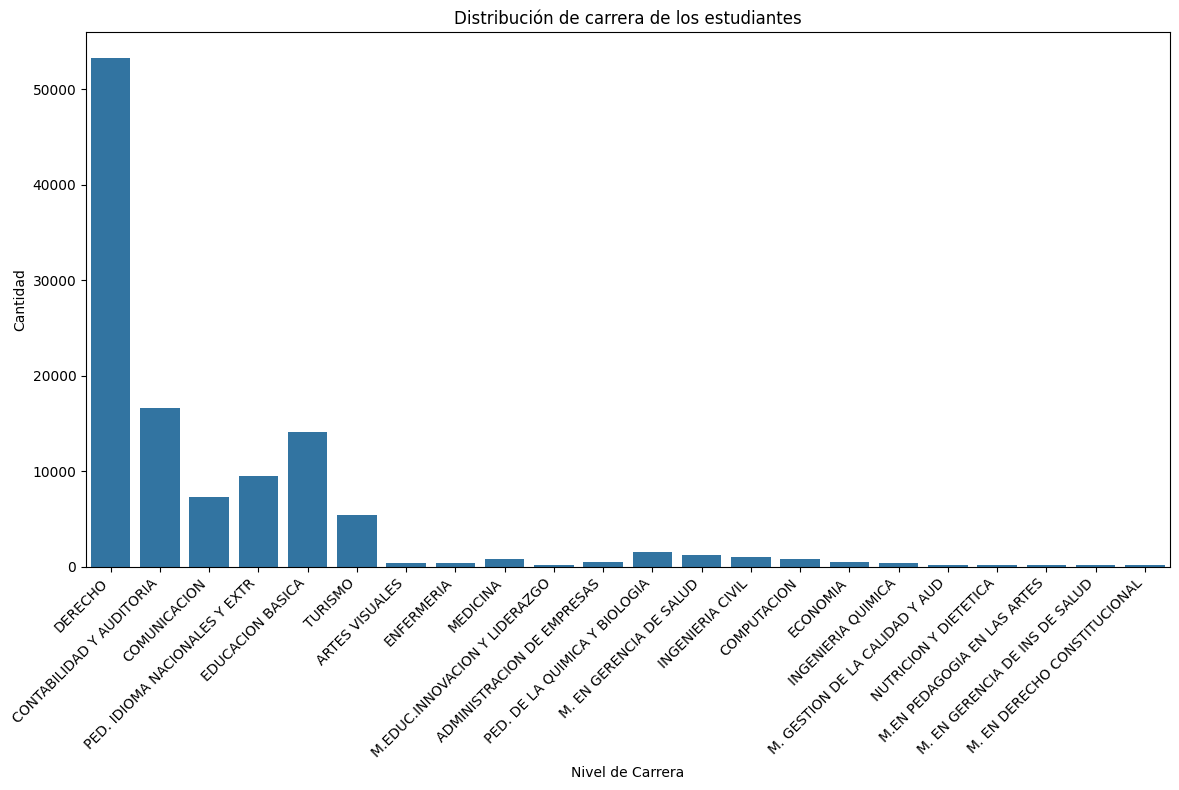

In [13]:
# Aumenta el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crea el gráfico de barras
sns.countplot(x='ESTUDIANTE_CARRERA_NOMBRE', data=data)

# Ajusta el título y las etiquetas
plt.title('Distribución de carrera de los estudiantes')
plt.xlabel('Nivel de Carrera')
plt.ylabel('Cantidad')

# Rota las etiquetas del eje x y ajusta el espaciado
plt.xticks(rotation=45, ha='right')

# Ajusta el espaciado para evitar el solapamiento
plt.tight_layout()

# Muestra el gráfico
plt.show()

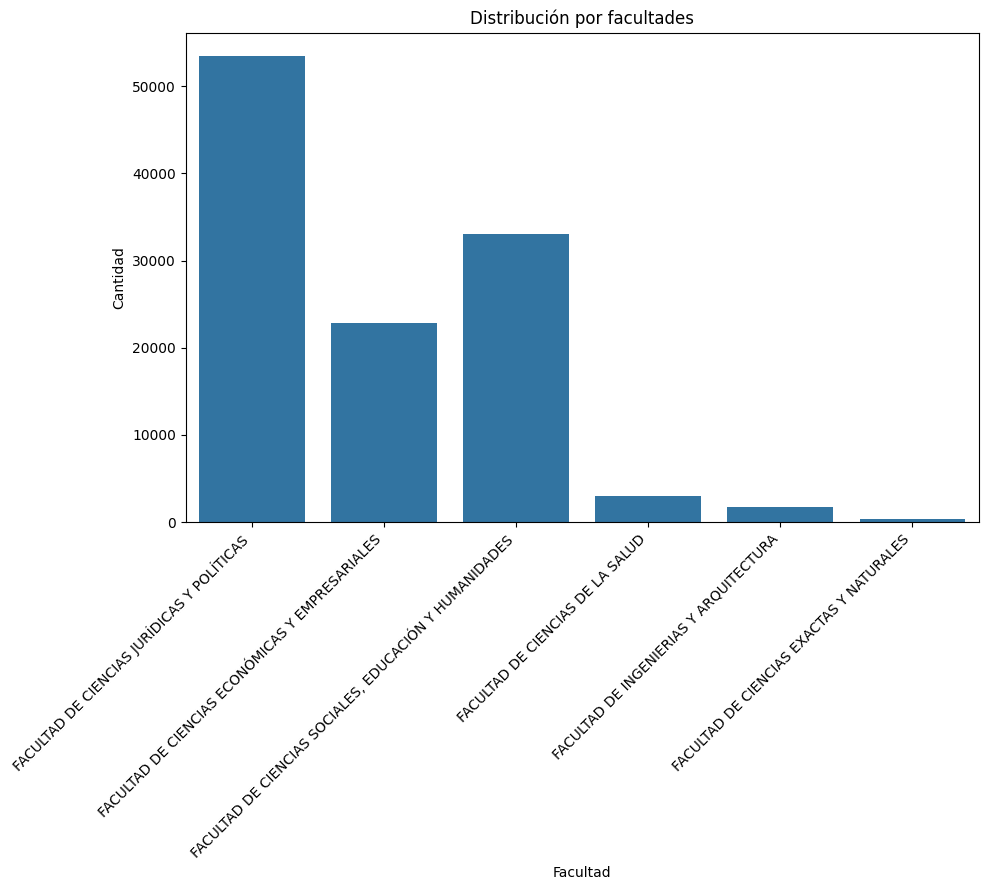

In [14]:
# Aumenta el tamaño de la figura
plt.figure(figsize=(10, 9))
# Crea el gráfico de barras
sns.countplot(x='ESTUDIANTE_CARRERA_RESPONSABLE', data=data)
# Ajusta el título y las etiquetas
plt.title('Distribución por facultades')
plt.xlabel('Facultad')
plt.ylabel('Cantidad')
# Rota las etiquetas del eje x y ajusta el espaciado
plt.xticks(rotation=45, ha='right')

# Ajusta el espaciado para evitar el solapamiento
plt.tight_layout()

# Muestra el gráfico
plt.show()

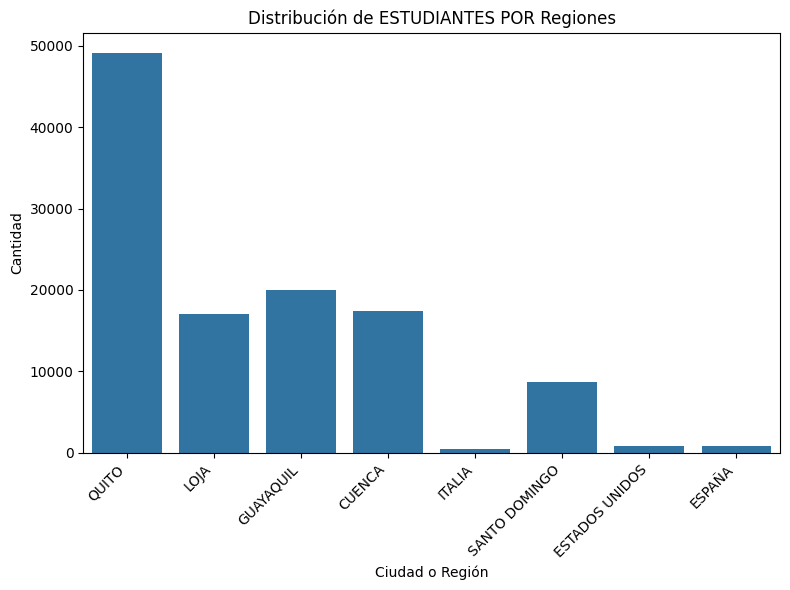

In [15]:
import folium
# Aumenta el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crea el gráfico de barras
sns.countplot(x='ESTUDIANTE_CENTRO_REGION', data=data)

# Ajusta el título y las etiquetas
plt.title('Distribución de ESTUDIANTES POR Regiones')
plt.xlabel('Ciudad o Región')
plt.ylabel('Cantidad')

# Rota las etiquetas del eje x y ajusta el espaciado
plt.xticks(rotation=45, ha='right')

# Ajusta el espaciado para evitar el solapamiento
plt.tight_layout()

# Muestra el gráfico
plt.show()

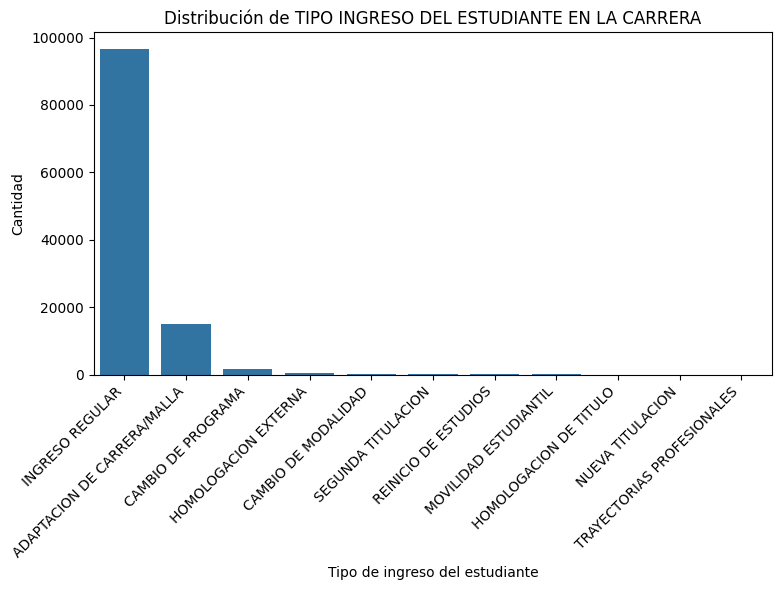

In [16]:
import folium
# Aumenta el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crea el gráfico de barras
sns.countplot(x='EST_CARR_TIPO_INGRESO', data=data)

# Ajusta el título y las etiquetas
plt.title('Distribución de TIPO INGRESO DEL ESTUDIANTE EN LA CARRERA')
plt.xlabel('Tipo de ingreso del estudiante')
plt.ylabel('Cantidad')

# Rota las etiquetas del eje x y ajusta el espaciado
plt.xticks(rotation=45, ha='right')

# Ajusta el espaciado para evitar el solapamiento
plt.tight_layout()

# Muestra el gráfico
plt.show()

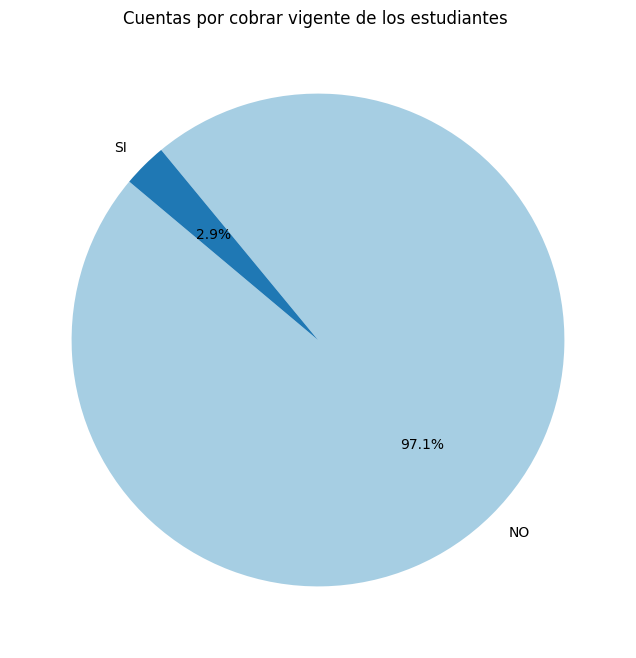

In [17]:
# Contar las ocurrencias de cada categoría en 'ESTUDIANTE_SEXO'
counts = data['CTAXCOBRAR_VIGENTE'].value_counts()

# Crear el gráfico de sectores
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))

# Ajustar el título
plt.title('Cuentas por cobrar vigente de los estudiantes ')

# Mostrar el gráfico
plt.show()

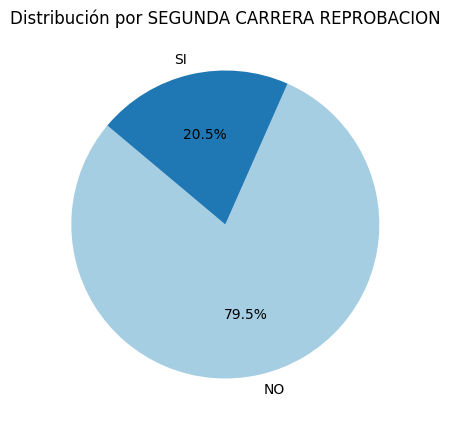

In [18]:
# Contar las ocurrencias de cada categoría en 'ESTUDIANTE_SEXO'
counts = data['EST_CARR_SEGUNDA_REPROBACION'].value_counts()

# Crear el gráfico de sectores
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))

# Ajustar el título
plt.title('Distribución por SEGUNDA CARRERA REPROBACION')

# Mostrar el gráfico
plt.show()

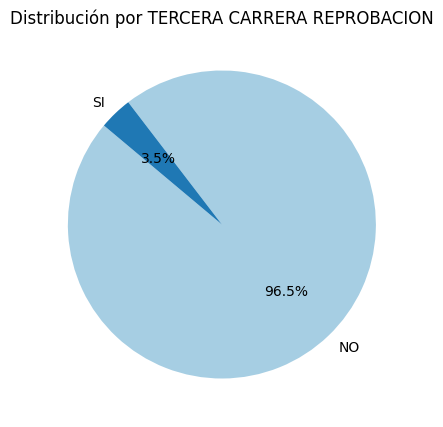

In [19]:
# Contar las ocurrencias de cada categoría en 'ESTUDIANTE_SEXO'
counts = data['EST_CARR_TERCERA_REPROBACION'].value_counts()

# Crear el gráfico de sectores
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))

# Ajustar el título
plt.title('Distribución por TERCERA CARRERA REPROBACION')

# Mostrar el gráfico
plt.show()

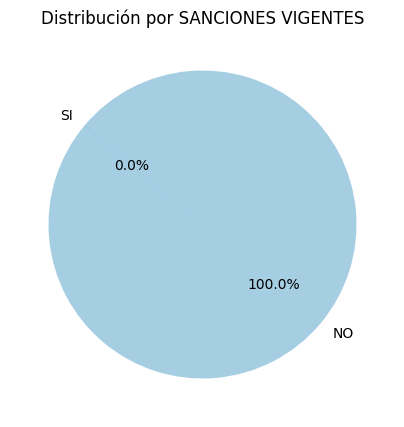

In [20]:
# Contar las ocurrencias de cada categoría en 'ESTUDIANTE_SEXO'
counts = data['ESTUDIANTE_SANCIONES_VIGENTES'].value_counts()

# Crear el gráfico de sectores
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))

# Ajustar el título
plt.title('Distribución por SANCIONES VIGENTES')

# Mostrar el gráfico
plt.show()

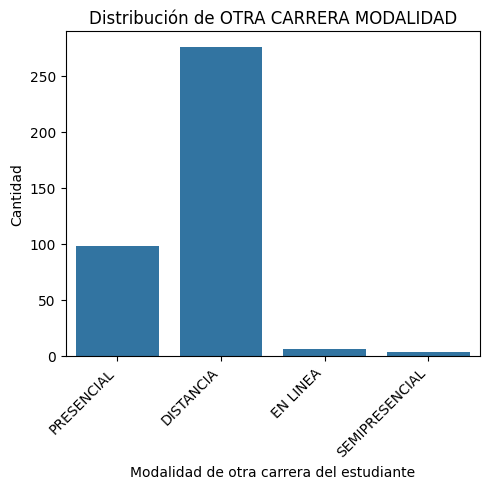

In [21]:
import folium
# Aumenta el tamaño de la figura
plt.figure(figsize=(5, 5))

# Crea el gráfico de barras
sns.countplot(x='OTRA_CARR_GRAD_MODALIDAD', data=data)

# Ajusta el título y las etiquetas
plt.title('Distribución de OTRA CARRERA MODALIDAD')
plt.xlabel('Modalidad de otra carrera del estudiante')
plt.ylabel('Cantidad')

# Rota las etiquetas del eje x y ajusta el espaciado
plt.xticks(rotation=45, ha='right')

# Ajusta el espaciado para evitar el solapamiento
plt.tight_layout()

# Muestra el gráfico
plt.show()

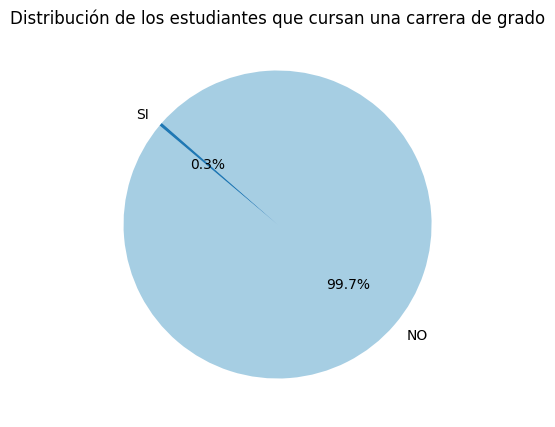

In [22]:
# Contar las ocurrencias de cada categoría en 'ESTUDIANTE_SEXO'
counts = data['CURSA_CARRERA_GRADO'].value_counts()

# Crear el gráfico de sectores
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))

# Ajustar el título
plt.title('Distribución de los estudiantes que cursan una carrera de grado')

# Mostrar el gráfico
plt.show()

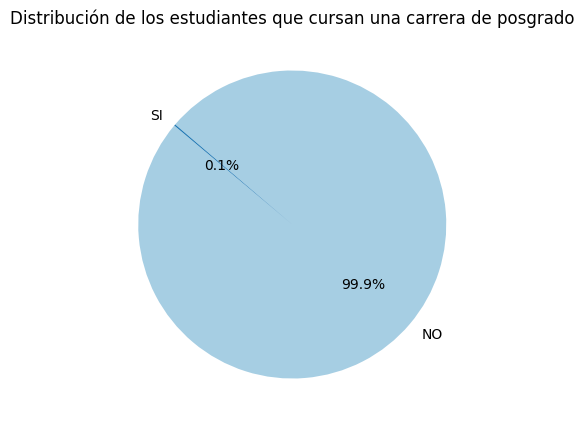

In [23]:
# Contar las ocurrencias de cada categoría en 'ESTUDIANTE_SEXO'
counts = data['CURSA_CARRERA_POSGR'].value_counts()

# Crear el gráfico de sectores
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))

# Ajustar el título
plt.title('Distribución de los estudiantes que cursan una carrera de posgrado')

# Mostrar el gráfico
plt.show()

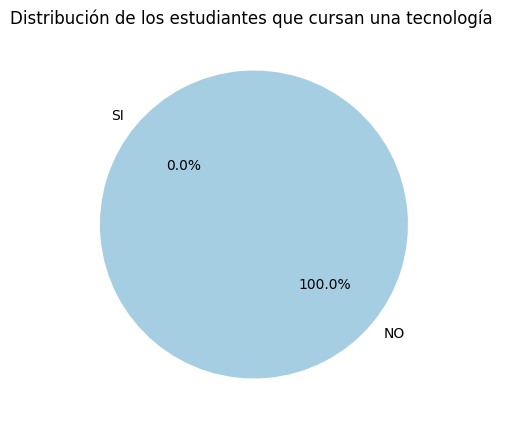

In [24]:

# Contar las ocurrencias de cada categoría en 'ESTUDIANTE_SEXO'
counts = data['CURSA_CARRERA_TEC'].value_counts()

# Crear el gráfico de sectores
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))

# Ajustar el título
plt.title('Distribución de los estudiantes que cursan una tecnología ')

# Mostrar el gráfico
plt.show()

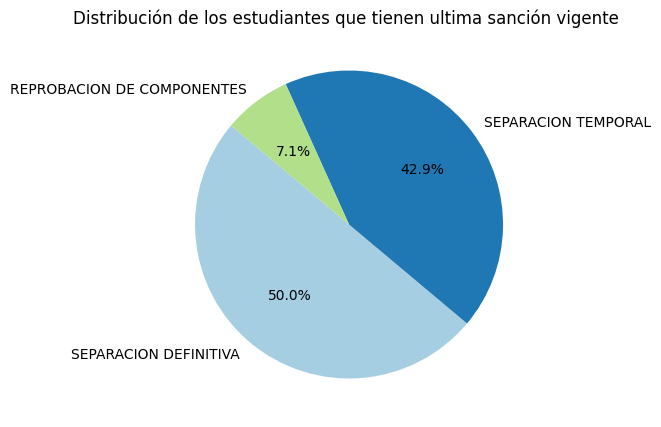

In [25]:

# Contar las ocurrencias de cada categoría en 'ESTUDIANTE_SEXO'
counts = data['ULTIMA_SANCION_VIGENTE'].value_counts()

# Crear el gráfico de sectores
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))

# Ajustar el título
plt.title('Distribución de los estudiantes que tienen ultima sanción vigente ')

# Mostrar el gráfico
plt.show()

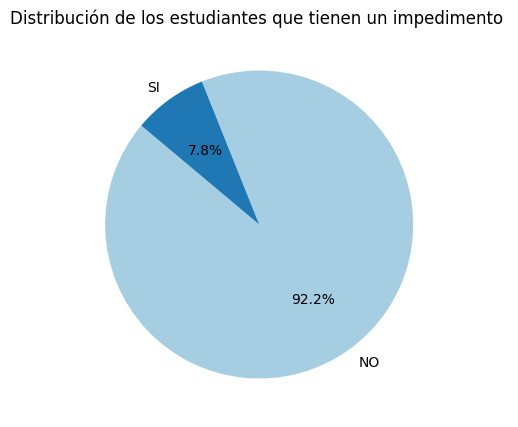

In [26]:

# Contar las ocurrencias de cada categoría en 'ESTUDIANTE_SEXO'
counts = data['IMPEDIMENTOS'].value_counts()

# Crear el gráfico de sectores
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))

# Ajustar el título
plt.title('Distribución de los estudiantes que tienen un impedimento ')

# Mostrar el gráfico
plt.show()

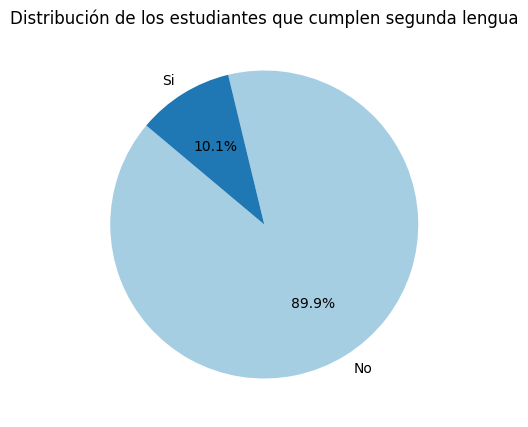

In [27]:

# Contar las ocurrencias de cada categoría en 'ESTUDIANTE_SEXO'
counts = data['CUMPLE_SEGUNDA_LENGUA'].value_counts()

# Crear el gráfico de sectores
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))

# Ajustar el título
plt.title('Distribución de los estudiantes que cumplen segunda lengua')

# Mostrar el gráfico
plt.show()

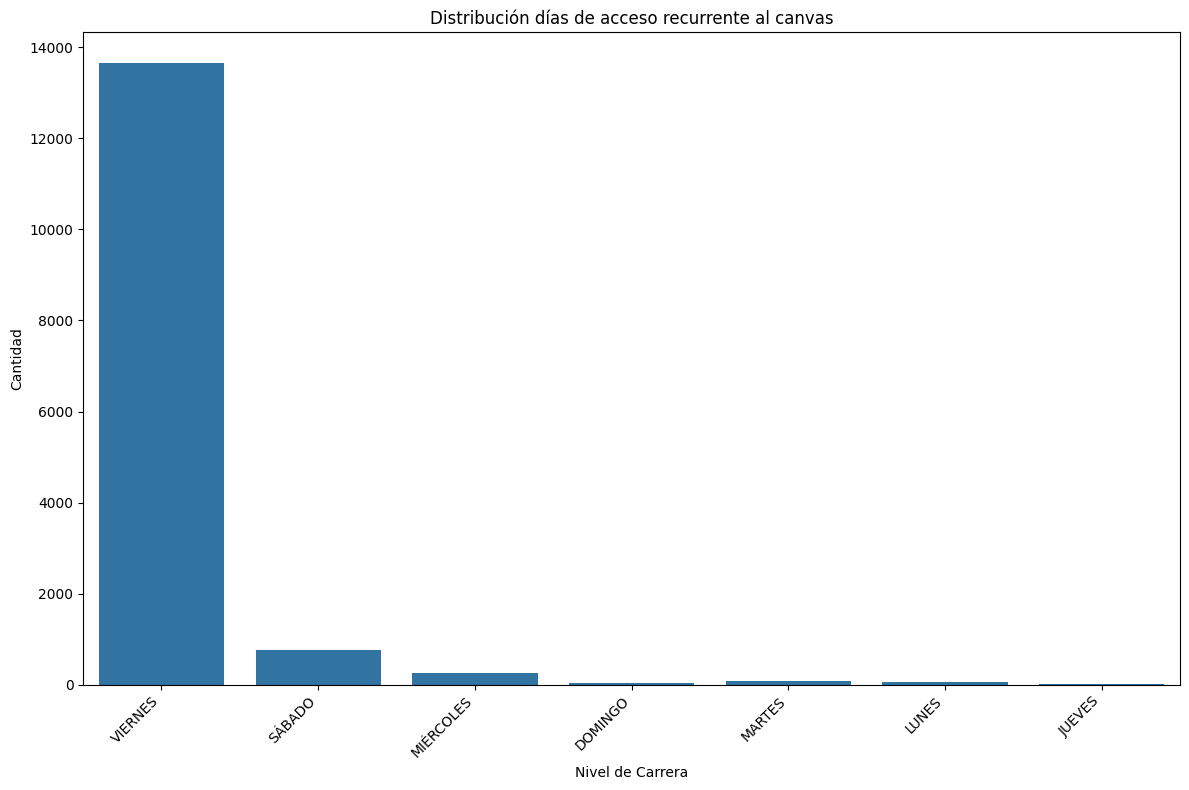

In [28]:
# Aumenta el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crea el gráfico de barras
sns.countplot(x='DIA_RECURRENTE_ACCESOS', data=data)

# Ajusta el título y las etiquetas
plt.title('Distribución días de acceso recurrente al canvas')
plt.xlabel('Nivel de Carrera')
plt.ylabel('Cantidad')

# Rota las etiquetas del eje x y ajusta el espaciado
plt.xticks(rotation=45, ha='right')

# Ajusta el espaciado para evitar el solapamiento
plt.tight_layout()

# Muestra el gráfico
plt.show()

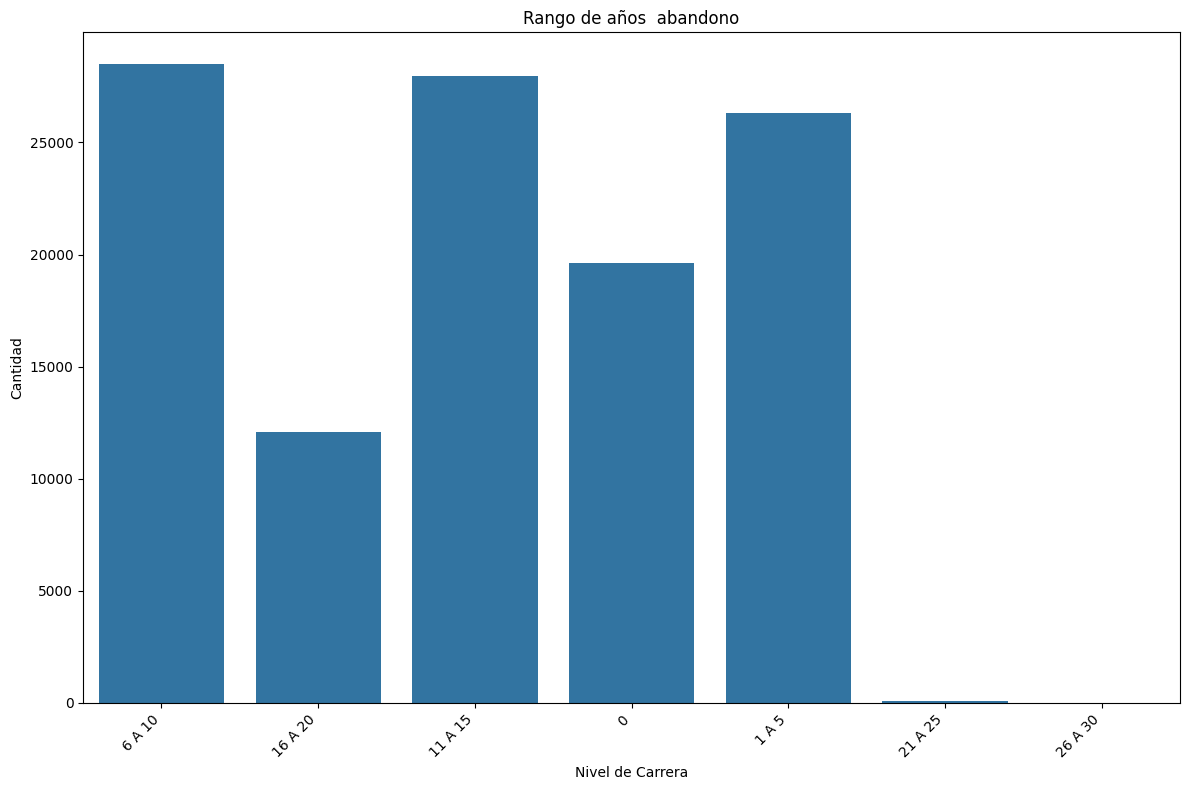

In [29]:
# Aumenta el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crea el gráfico de barras
sns.countplot(x='RANGO_ANIOS_ABANDONO', data=data)

# Ajusta el título y las etiquetas
plt.title('Rango de años  abandono')
plt.xlabel('Nivel de Carrera')
plt.ylabel('Cantidad')

# Rota las etiquetas del eje x y ajusta el espaciado
plt.xticks(rotation=45, ha='right')

# Ajusta el espaciado para evitar el solapamiento
plt.tight_layout()

# Muestra el gráfico
plt.show()

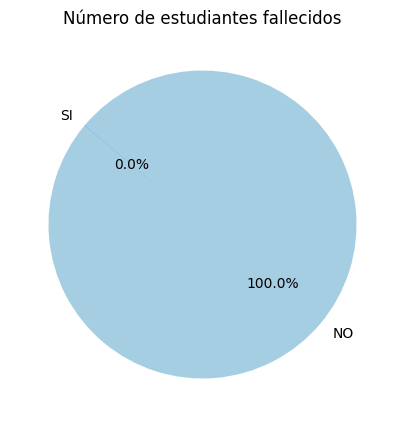

In [30]:
# Contar las ocurrencias de cada categoría en 'ESTUDIANTE_SEXO'
counts = data['ESTUDIANTE_FALLECIDO'].value_counts()

# Crear el gráfico de sectores
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))

# Ajustar el título
plt.title('Número de estudiantes fallecidos')

# Mostrar el gráfico
plt.show()

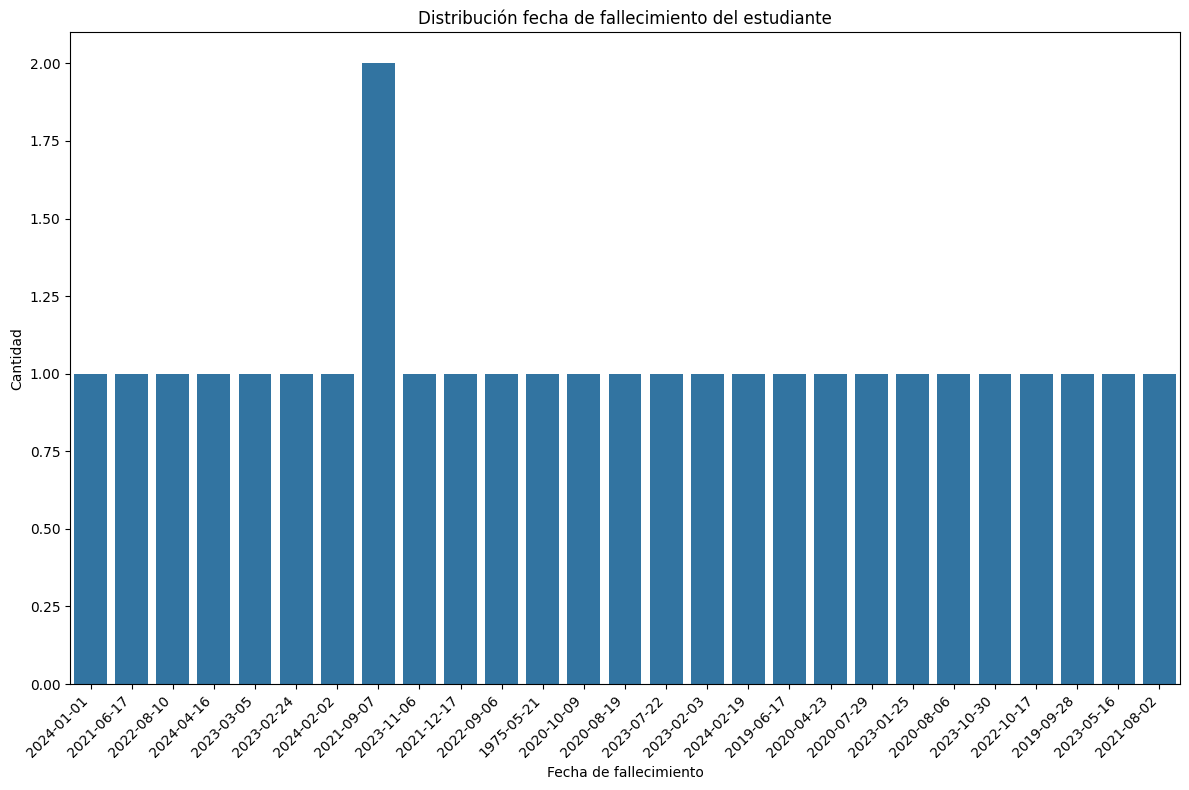

In [31]:

# Aumenta el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crea el gráfico de barras
sns.countplot(x='ESTUDIANTE_FECHA_FALLECIMIENTO', data=data)

# Ajusta el título y las etiquetas
plt.title('Distribución fecha de fallecimiento del estudiante')
plt.xlabel('Fecha de fallecimiento')
plt.ylabel('Cantidad')

# Rota las etiquetas del eje x y ajusta el espaciado
plt.xticks(rotation=45, ha='right')

# Ajusta el espaciado para evitar el solapamiento
plt.tight_layout()

# Muestra el gráfico
plt.show()

# COLUMNAS NÚMERICAS

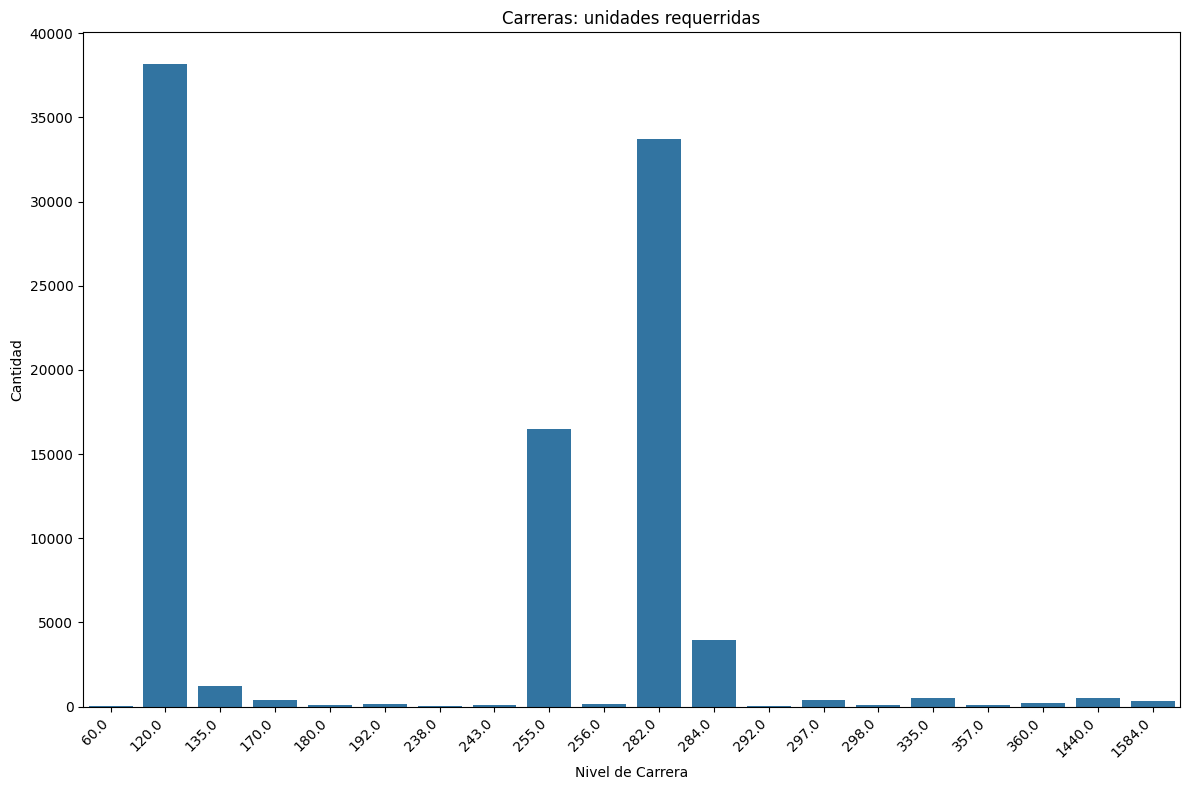

In [32]:
# Aumenta el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crea el gráfico de barras
sns.countplot(x='EST_CARR_UNIDADES_REQUERIDAS', data=data)

# Ajusta el título y las etiquetas
plt.title('Carreras: unidades requerridas')
plt.xlabel('Nivel de Carrera')
plt.ylabel('Cantidad')

# Rota las etiquetas del eje x y ajusta el espaciado
plt.xticks(rotation=45, ha='right')

# Ajusta el espaciado para evitar el solapamiento
plt.tight_layout()

# Muestra el gráfico
plt.show()

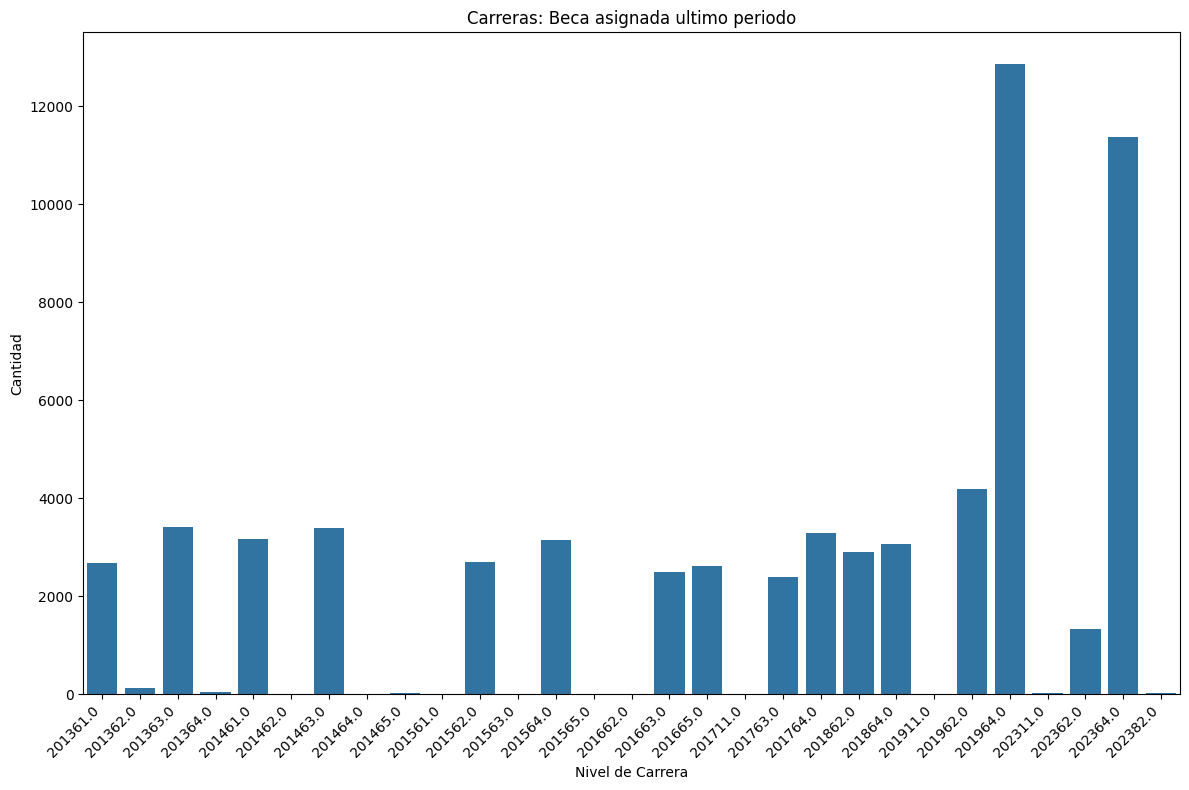

In [33]:
# Aumenta el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crea el gráfico de barras
sns.countplot(x='ULT_BECA_PERIODO_CODIGO', data=data)

# Ajusta el título y las etiquetas
plt.title('Carreras: Beca asignada ultimo periodo')
plt.xlabel('Nivel de Carrera')
plt.ylabel('Cantidad')

# Rota las etiquetas del eje x y ajusta el espaciado
plt.xticks(rotation=45, ha='right')

# Ajusta el espaciado para evitar el solapamiento
plt.tight_layout()

# Muestra el gráfico
plt.show()

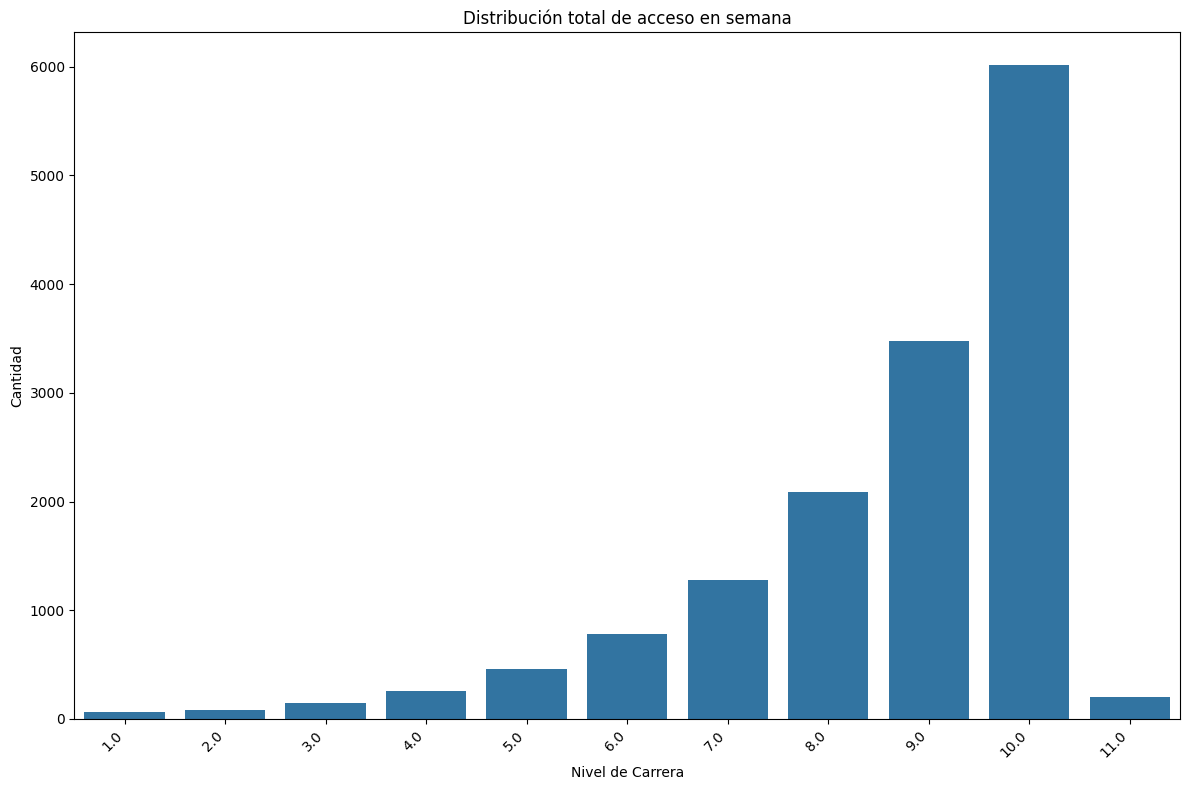

In [34]:
# Aumenta el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crea el gráfico de barras
sns.countplot(x='TOTAL_SEMANAS_ACCESOS', data=data)

# Ajusta el título y las etiquetas
plt.title('Distribución total de acceso en semana')
plt.xlabel('Nivel de Carrera')
plt.ylabel('Cantidad')

# Rota las etiquetas del eje x y ajusta el espaciado
plt.xticks(rotation=45, ha='right')

# Ajusta el espaciado para evitar el solapamiento
plt.tight_layout()

# Muestra el gráfico
plt.show()

# Bivariable
### Cuentas por cobrar según nivel de carrera

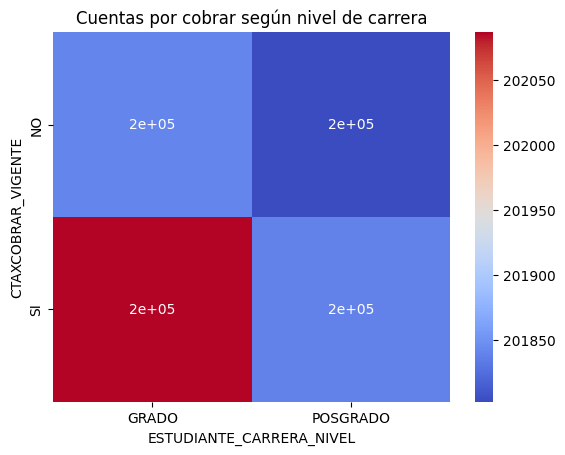

In [35]:
relacion = pd.crosstab(data['CTAXCOBRAR_VIGENTE'], data['ESTUDIANTE_CARRERA_NIVEL'], data['ULT_BECA_PERIODO_CODIGO'], aggfunc='mean')

# Mapa de calor de la tabla de contingencia
sns.heatmap(relacion, annot=True, cmap='coolwarm')
plt.title('Cuentas por cobrar según nivel de carrera')
plt.show()


In [36]:
### Análisis 

In [37]:
data.groupby(["ESTUDIANTE_CARRERA_MODALIDAD", "ESTUDIANTE_CARRERA_NIVEL"])["ULT_BECA_PERIODO_CODIGO"].count()

ESTUDIANTE_CARRERA_MODALIDAD  ESTUDIANTE_CARRERA_NIVEL
DISTANCIA                     GRADO                       62203
                              POSGRADO                      273
EN LINEA                      POSGRADO                      103
PRESENCIAL                    GRADO                        2649
Name: ULT_BECA_PERIODO_CODIGO, dtype: int64

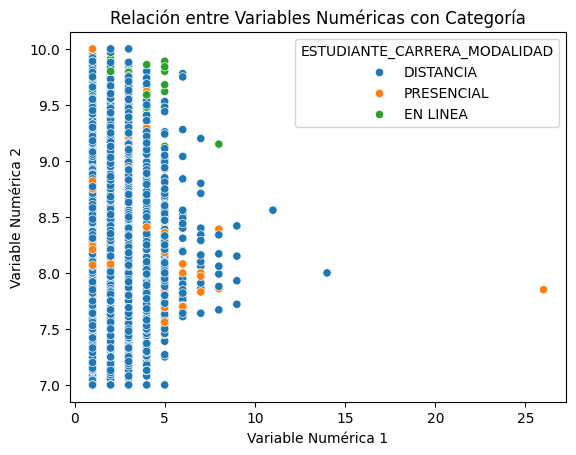

In [38]:
# Gráfico de dispersión con hue
sns.scatterplot(x='ESTUDIANTE_CARRERA_PLAN_ESTUD', y='PROMEDIO_GENERAL', hue='ESTUDIANTE_CARRERA_MODALIDAD', data=data)
plt.title('Relación entre Variables Numéricas con Categoría')
plt.xlabel('Variable Numérica 1')
plt.ylabel('Variable Numérica 2')
plt.show()

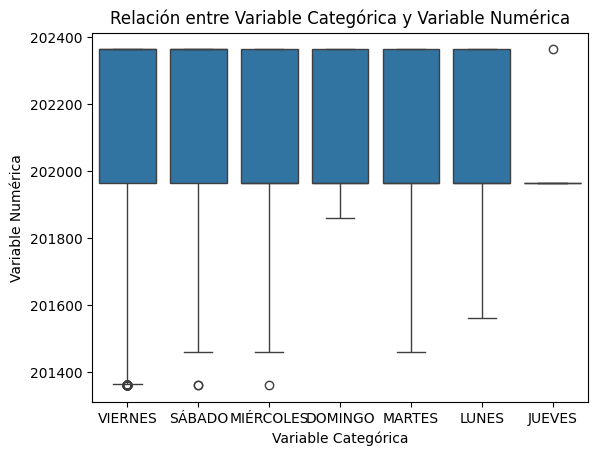

In [39]:
# Gráfico de barras
sns.boxplot(x='DIA_RECURRENTE_ACCESOS', y='ULT_BECA_PERIODO_CODIGO', data=data)
plt.title('Relación entre Variable Categórica y Variable Numérica')
plt.xlabel('Variable Categórica')
plt.ylabel('Variable Numérica')
plt.show()

In [40]:
# Resúmenes de datos de las variables categóricas:
print("Resumen estadístico de columnas categóricas:")
# print(data.describe(include=['object', 'category']))
data.describe(include=['object', 'category'])

Resumen estadístico de columnas categóricas:


,ESTUDIANTE_FECHA_FALLECIMIENTO,ESTUDIANTE_CARRERA_NIVEL_COD,ESTUDIANTE_CARRERA_NIVEL,ESTUDIANTE_CARRERA_MODALID_COD,ESTUDIANTE_CARRERA_MODALIDAD,ESTUDIANTE_CARRERA_CODIGO,ESTUDIANTE_CARRERA_NOMBRE,ESTUDIANTE_CARRERA_MALLA_COD,EST_CARR_MALLA_NOMBRE_CORTO,EST_CARR_MALLA_NOMBRE_LARGO,...,CUMPLE_SEGUNDA_LENGUA,EST_CARRERA_PROGRAMA_CODIGO,ULT_MAT_EST_CAR_PERIODO,ULT_MAT_EST_UTPL_PERIODO,EST_CARR_OTRA_MALLA_SIN_MATRIC,FECHA_PRIMER_ACCESO,HORA_PRIMER_ACCESO,FECHA_ULTIMO_ACCESO,HORA_ULTIMO_ACCESO,DIA_RECURRENTE_ACCESOS
count,28,114519,114519,114519,114519,114519,114519,114519,114519,114519,...,114519,114519,112686,114014,114519,14839,14839,14839,14839,14839
unique,27,2,2,3,3,25,22,77,73,36,...,2,22,81,92,2,14151,13015,14250,12346,7
top,2021-09-07,GR,GRADO,D,DISTANCIA,DERE_D1,DERECHO,DED6,DERECHO RE2,DERECHO,...,No,DE,ABR/2024 - AGO/2024,ABR/2024 - AGO/2024,NO,2024-04-08 00:01:52,08:32:56,2024-06-12 18:59:43,18:59:48,VIERNES
freq,2,112455,112455,108550,108550,53283,53283,23544,23544,53283,...,102926,53283,17663,19068,114404,4,5,6,6,13649


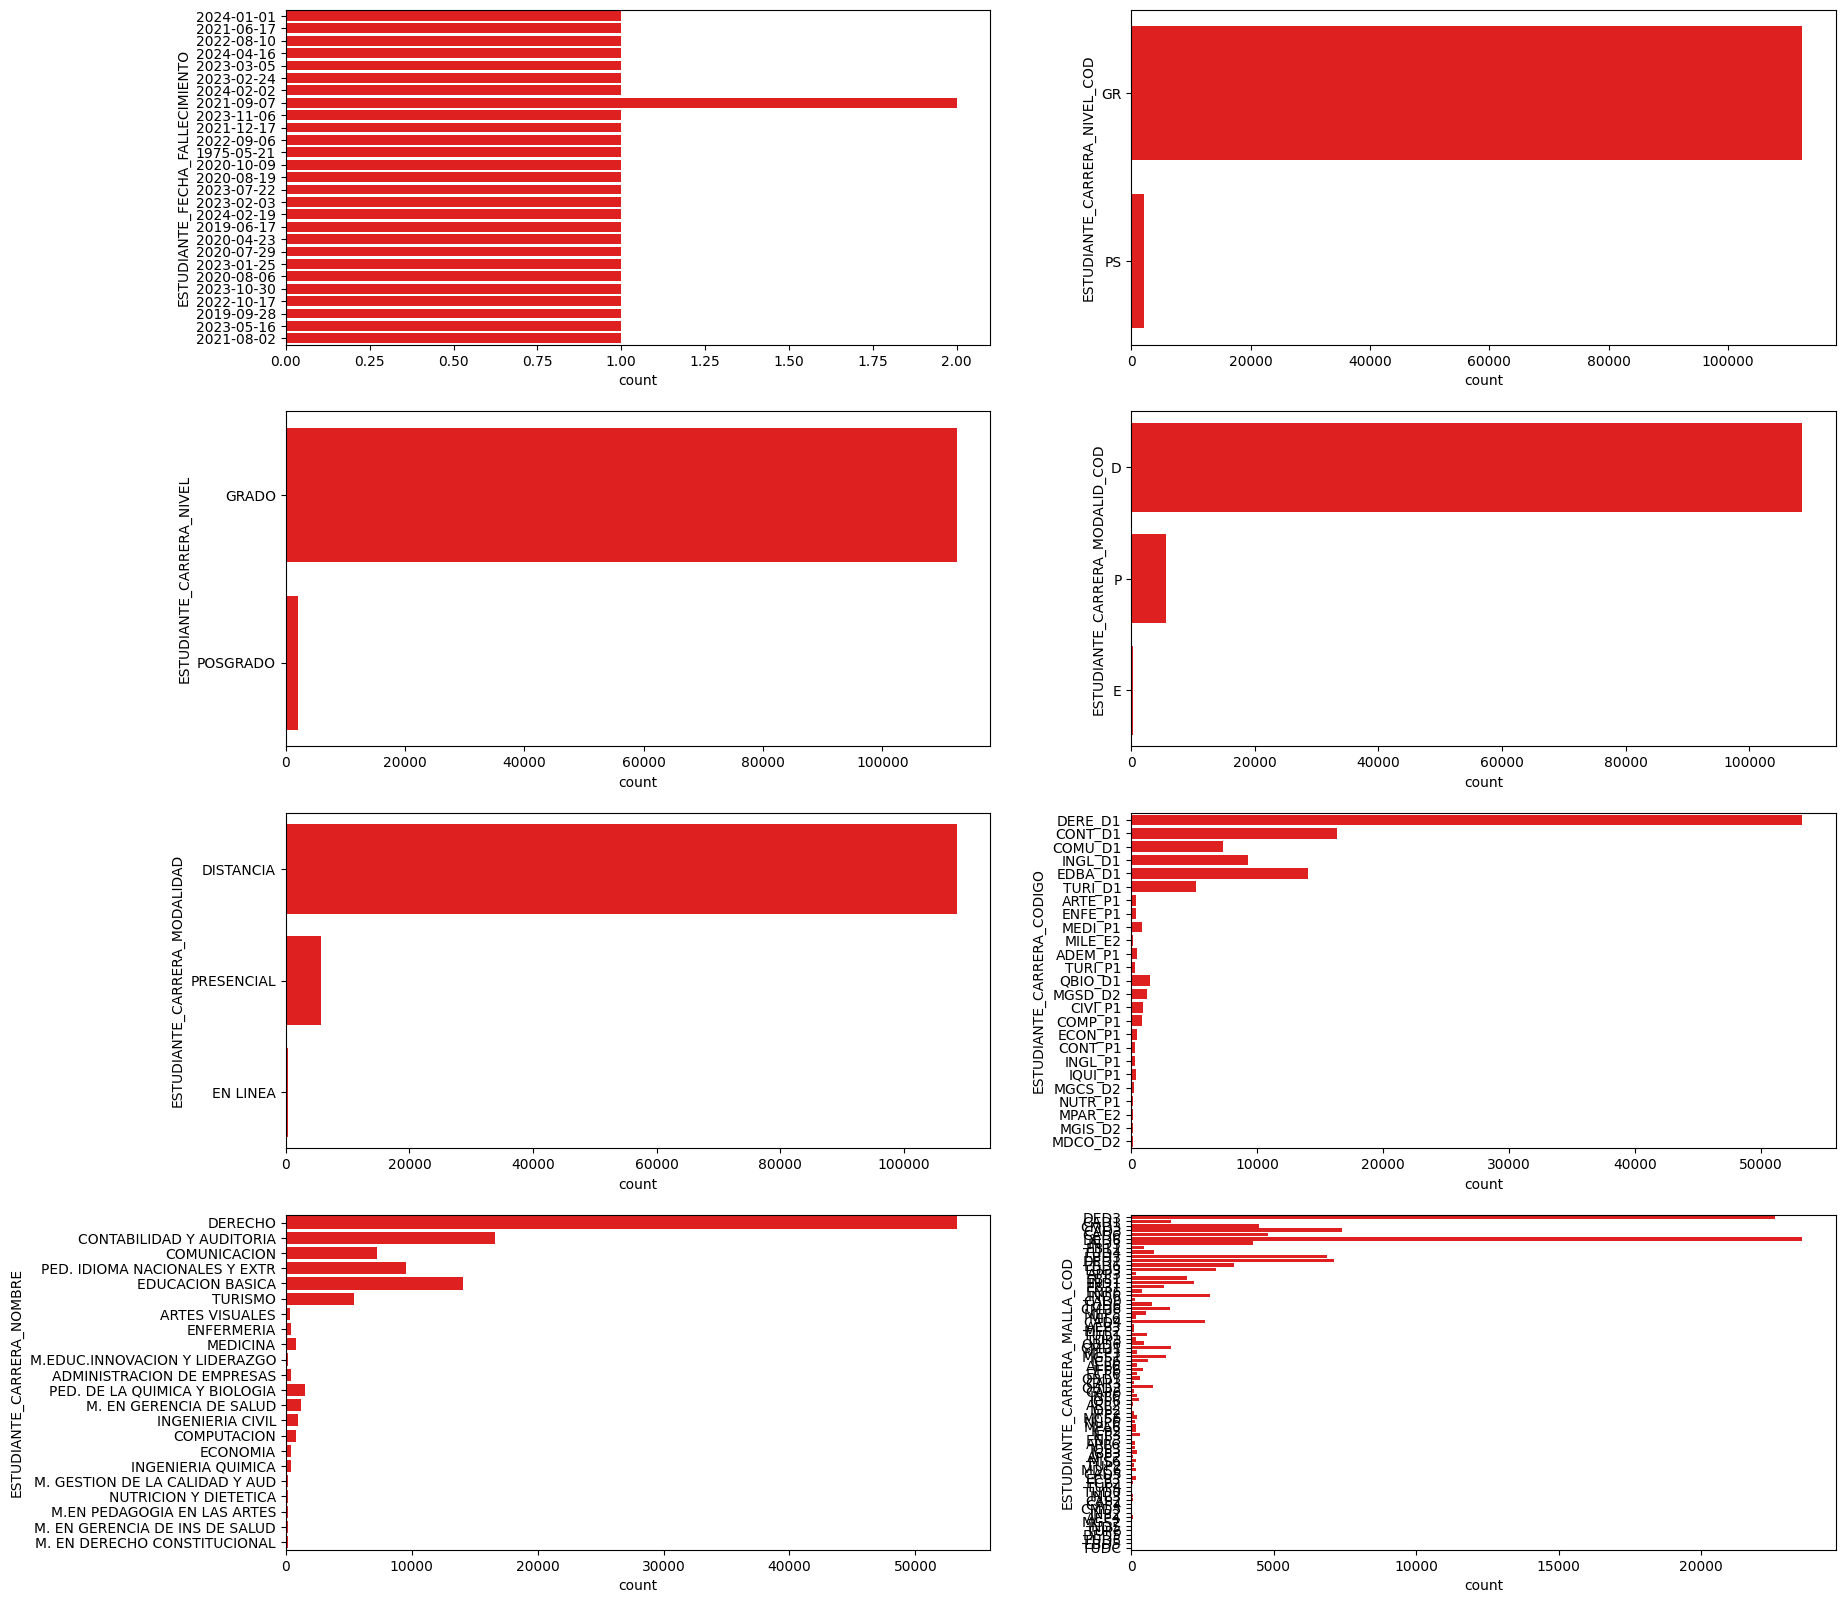

In [41]:
# Create axis for subplots
fig,subplots = plt.subplots(4,2,figsize=(20,20))

# Display count plot for all categorical columns
for column,axis in zip(data.select_dtypes(include=object),subplots.flatten()):
    sns.countplot(data[column],ax=axis,color="r")

### EDA Multivariado

In [42]:
# dataIni.shape
# dataIni.describe()
# Número total de filas
total_filas = len(data)

# Número total de columnas
total_columnas = len(data.columns)

print(f"Total de filas:\t\t{total_filas}")
print()
print(f"Total de columnas:\t{total_columnas}")
print()
# Conteo de carreras únicas
num_carreras = data['ESTUDIANTE_CARRERA_NOMBRE'].nunique()
carreras_unicas = data['ESTUDIANTE_CARRERA_NOMBRE'].unique()

print(f"Número de carreras:\t{num_carreras}")
print()
print(f"Carreras únicas:\n{carreras_unicas}")
print()
# Conteo de géneros
if 'ESTUDIANTE_SEXO' in data.columns:
    conteo_genero = data['ESTUDIANTE_SEXO'].value_counts()
    print(f"Conteo de género:\n{conteo_genero}")
else:
    print("No se dispone de información sobre género.")
print()
# Conteo de becarios
if 'ESTADO_BECA' in data.columns:
    conteo_becados = data['ESTADO_BECA'].value_counts()
    print(f"Conteo de Becarios:\n{conteo_becados}")
else:
    print("No se dispone de información sobre Becas.")
print()
# Ejemplo con una columna específica:
columna_ejemplo = 'ESTUDIANTE_CARRERA_MODALIDAD'
valores_unicos = data[columna_ejemplo].unique()
print(f"Valores únicos en {columna_ejemplo}:\n{valores_unicos}")
print()
# Conteo de niveles de carrera
if 'ESTUDIANTE_CARRERA_NIVEL' in data.columns:
    conteo_nivel_carrera = data['ESTUDIANTE_CARRERA_NIVEL'].value_counts()
    print(f"Conteo de niveles de carrera:\n{conteo_nivel_carrera}")
else:
    print("No se dispone de información sobre niveles de carrera.")
print()
# Conteo de regiones únicas
num_region = data['ESTUDIANTE_CENTRO_NOMBRE'].nunique()
# Lista de regiones únicas
centros_unicas = data['ESTUDIANTE_CENTRO_NOMBRE'].unique()
print(f"Número de centros educativos: {num_region}")
print()
print(f"Lista de regiones únicas:")
print()
print(centros_unicas)
print()
# Conteo de columnas con valores nulos
num_columnas_nulas = data.isna().any(axis=0).sum()
# Imprimir el resultado
print(f"Número de columnas con valores nulos: {num_columnas_nulas}")



Total de filas:		114519

Total de columnas:	166

Número de carreras:	22

Carreras únicas:
['DERECHO' 'CONTABILIDAD Y AUDITORIA' 'COMUNICACION'
 'PED. IDIOMA NACIONALES Y EXTR' 'EDUCACION BASICA' 'TURISMO'
 'ARTES VISUALES' 'ENFERMERIA' 'MEDICINA' 'M.EDUC.INNOVACION Y LIDERAZGO'
 'ADMINISTRACION DE EMPRESAS' 'PED. DE LA QUIMICA Y BIOLOGIA'
 'M. EN GERENCIA DE SALUD' 'INGENIERIA CIVIL' 'COMPUTACION' 'ECONOMIA'
 'INGENIERIA QUIMICA' 'M. GESTION DE LA CALIDAD Y AUD'
 'NUTRICION Y DIETETICA' 'M.EN PEDAGOGIA EN LAS ARTES'
 'M. EN GERENCIA DE INS DE SALUD' 'M. EN DERECHO CONSTITUCIONAL']

Conteo de género:
ESTUDIANTE_SEXO
MUJER            62314
HOMBRE           49753
NO DISPONIBLE     2452
Name: count, dtype: int64

No se dispone de información sobre Becas.

Valores únicos en ESTUDIANTE_CARRERA_MODALIDAD:
['DISTANCIA' 'PRESENCIAL' 'EN LINEA']

Conteo de niveles de carrera:
ESTUDIANTE_CARRERA_NIVEL
GRADO       112455
POSGRADO      2064
Name: count, dtype: int64

Número de centros educativos: 1

2 **ULT_BECA_PERIODO** 
- Crear columna Mes y Año a partir de la columna ULT_BECA_PERIODO
- Silenciar columna ULT_BECA_PERIODO

In [43]:
data['ULT_BECA_PERIODO'] = data['ULT_BECA_PERIODO'].str.replace(r'\s*-\s*', ' - ', regex=True)

# Definir una función para separar el mes y el año de inicio y fin
def separar_periodo(periodo):
    if pd.isna(periodo):
        return np.nan, np.nan, np.nan, np.nan
    elif ' - ' in periodo:
        try:
            inicio, fin = periodo.split(' - ')
            if 'PE' in inicio or 'PE' in fin:
                # Caso especial para valores como 'PE 1 - 2015'
                if 'PE' in inicio and 'PE' in fin:
                    return inicio, fin, fin, fin
                elif 'PE' in inicio:
                    return inicio, fin, inicio, fin
                elif 'PE' in fin:
                    return inicio, fin, fin, fin
                else:
                    mes_ini, año_ini = inicio.split('/')
                    mes_fin, año_fin = fin.split('/')
                    return mes_ini, año_ini, mes_fin, año_fin
            else:
                mes_ini, año_ini = inicio.split('/')
                mes_fin, año_fin = fin.split('/')
                return mes_ini, año_ini, mes_fin, año_fin
        except:
            return np.nan, np.nan, np.nan, np.nan
    elif 'PE' in periodo:
        return periodo, periodo, periodo, periodo
    else:
        return np.nan, np.nan, np.nan, np.nan



# Aplicar la función a cada fila de la columna ULT_BECA_PERIODO
data[['MES_INI', 'AÑO_INI', 'MES_FIN', 'AÑO_FIN']] = data['ULT_BECA_PERIODO'].apply(lambda x: pd.Series(separar_periodo(x)))

# Mostrar el DataFrame resultante
print(data[['ULT_BECA_PERIODO', 'MES_INI', 'AÑO_INI', 'MES_FIN', 'AÑO_FIN']])

           ULT_BECA_PERIODO MES_INI AÑO_INI MES_FIN AÑO_FIN
0       OCT/2015 - FEB/2016     OCT    2015     FEB    2016
1                       NaN     NaN     NaN     NaN     NaN
2                       NaN     NaN     NaN     NaN     NaN
3       OCT/2013 - FEB/2014     OCT    2013     FEB    2014
4       ABR/2014 - AGO/2014     ABR    2014     AGO    2014
...                     ...     ...     ...     ...     ...
114514  ABR/2014 - AGO/2014     ABR    2014     AGO    2014
114515  OCT/2018 - FEB/2019     OCT    2018     FEB    2019
114516  OCT/2014 - FEB/2015     OCT    2014     FEB    2015
114517  ABR/2019 - AGO/2019     ABR    2019     AGO    2019
114518                  NaN     NaN     NaN     NaN     NaN

[114519 rows x 5 columns]


#### Extrae en un CSV todas las columnas con sus valores nulos

In [45]:
# # Obtener nombres de las variables categóricas
# cat_features = [column for column in data1.columns if data1[column].dtype == 'object']

# # Obtener nombres de las variables numéricas
# num_features = [column for column in data1.columns if data1[column].dtype == 'int64' or data1[column].dtype == 'float64']

# # Calcular el número de nulos por columna
# null_counts = data1.isnull().sum()

# # Obtener los valores únicos para columnas categóricas
# unique_values_cat = [data1[col].dropna().unique() for col in cat_features]

# # Obtener los valores únicos para columnas numéricas (en este caso no suele ser tan relevante, pero se incluye para consistencia)
# unique_values_num = [data1[col].dropna().unique() for col in num_features]

# # Crear un DataFrame para mostrar la información
# columnas = pd.DataFrame({
#     'Columnas Categóricas': pd.Series(cat_features),
#     'Nulos Categóricas': pd.Series([null_counts[col] for col in cat_features]),
#     'Valores Únicos Categóricas': pd.Series([', '.join(map(str, unique_values)) for unique_values in unique_values_cat]),
#     'Columnas Numéricas': pd.Series(num_features),
#     'Nulos Numéricas': pd.Series([null_counts[col] for col in num_features]),
#     'Valores Únicos Numéricas': pd.Series([', '.join(map(str, unique_values)) for unique_values in unique_values_num])
# })

# # Guardar el DataFrame en un archivo CSV
# # cols = columnas.to_csv('resumenData.csv', sep=';', index=False)
